### This uses PyCaret to test different models on the dataset.

In [13]:
import seaborn as sns
import pandas as pd

A function for examining model metrics

Read in the dataset.

In [14]:
#df = pd.read_csv("../../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")
# df = pd.read_csv("../../data/current_clean_spectrum.csv")
#df = pd.read_csv("../../data/scaling_test.csv")
df = pd.read_csv("../../data/raw_df_outliers_removed.csv")

In [15]:
# fastRP_df = pd.read_csv("../../data/fastRP_embeddings.csv")
# statuses_df = pd.read_csv("../../data/SpecIDs_and_Status.csv")
# pivoted_df = fastRP_df.merge(statuses_df, on="SpecID").sort_values(by="SpecID").set_index('SpecID')

In [ ]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
1,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
2,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
3,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
4,201210-1-00,297,402.96127,1758.8690,201210-1,Normal


In [17]:
sample = df[df['SpecID'] == "210526-3-15"]

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

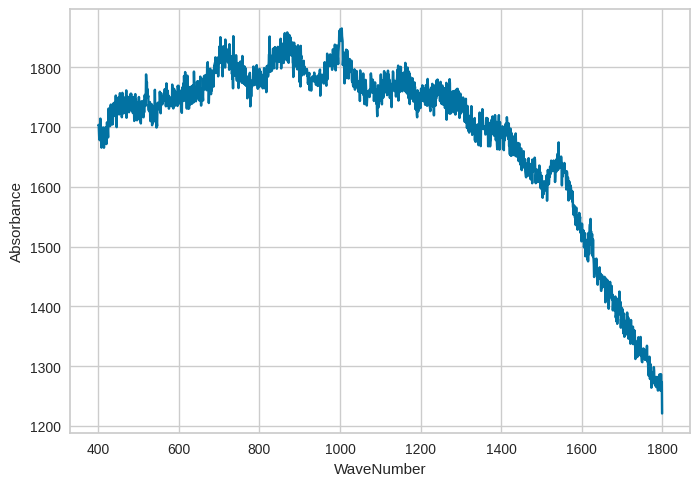

In [18]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

In [19]:
def prepare_wavelength_df(df, absorbance_col, status_col='Status'):

    # Pivot the DataFrame to get wavelengths as columns and absorbance values
    wavelength_df = df.pivot(index='SpecID', columns='WaveNumber', values=absorbance_col).reset_index()
    wavelength_df.columns.name = None

    # Merge with the statuses based on SpecID
    # Include the SurID to perform GroupKFold CV
    statuses_and_surface = df[['SpecID', 'SurID', status_col]].drop_duplicates()
    wavelength_df = pd.merge(wavelength_df, statuses_and_surface, on='SpecID')

    # Set SpecID as the index
    wavelength_df = wavelength_df.set_index('SpecID')

    return wavelength_df

Pivot the Dataframe to create a column for each wavelength

In [20]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [21]:
wavelength_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,407.06149,407.74487,408.42825,409.1116,409.79498,410.47836,411.16174,411.84509,412.52847,413.21185,413.8952,414.57858,415.26196,415.94534,416.62869,417.31207,417.99545,418.6788,419.36218,420.04556,420.72894,421.41229,422.09567,422.77905,423.4624,424.14578,424.82916,425.51254,426.19589,426.87927,427.56265,428.246,428.92938,429.61276,430.29614,430.97949,431.66287,432.34625,433.0296,433.71298,434.39636,435.07971,435.76309,436.44647,437.12985,437.8132,438.49658,439.17996,439.86331,440.54669,441.23007,441.91345,442.5968,443.28018,443.96356,444.64691,445.33029,446.01367,446.69705,447.3804,448.06378,448.74716,449.43051,450.11389,450.79727,451.48065,452.164,452.84738,453.53076,454.21411,454.89749,455.58087,456.26425,456.9476,457.63098,458.31436,458.99771,459.68109,460.36447,461.04782,461.7312,462.41458,463.09796,463.78131,464.46469,465.14807,465.83142,466.5148,467.19818,467.88156,468.56491,469.24829,469.93167,470.61502,471.2984,471.98178,472.66516,473.34851,474.03189,474.71527,475.39862,476.082,476.76538,477.44876,478.13211,478.81549,479.49887,480.18222,480.8656,481.54898,482.23236,482.91571,483.59909,484.28247,484.96582,485.6492,486.33258,487.01593,487.69931,488.38269,489.06607,489.74942,490.4328,491.11618,491.79953,492.48291,493.16629,493.84967,494.53302,495.2164,495.89978,496.58313,497.26651,497.94989,498.63327,499.31662,500.0,500.68338,501.36673,502.05011,502.73349,503.41687,504.10022,504.7836,505.46698,506.15033,506.83371,507.51709,508.20047,508.88382,509.5672,510.25058,510.93393,511.61731,512.30066,512.98407,513.66742,514.35077,515.03418,515.71753,516.40094,517.08429,517.76764,518.45105,519.1344,519.81775,520.50116,521.18451,521.86786,522.55127,523.23462,523.91797,524.60138,525.28473,525.96814,526.65149,527.33484,528.01825,528.7016,529.38495,530.06836,530.75171,531.43506,532.11847,532.80182,533.48517,534.16858,534.85193,535.53528,536.21869,536.90204,537.58545,538.2688,538.95215,539.63556,540.31891,541.00226,541.68567,542.36902,543.05237,543.73578,544.41913,545.10248,545.78589,546.46924,547.15265,547.836,548.51935,549.20276,549.88611,550.56946,551.25287,551.93622,552.61957,553.30298,553.98633,554.66968,555.35309,556.03644,556.71979,557.4032,558.08655,558.76996,559.45331,560.13666,560.82007,561.50342,562.18677,562.87018,563.55353,564.23688,564.92029,565.60364,566.28699,566.9704,567.65375,568.33716,569.02051,569.70386,570.38727,...,1630.9795,1631.6628,1632.3462,1633.0297,1633.713,1634.3964,1635.0797,1635.7631,1636.4464,1637.1299,1637.8132,1638.4966,1639.1799,1639.8633,1640.5468,1641.2301,1641.9135,1642.5968,1643.2802,1643.9635,1644.647,1645.3303,1646.0137,1646.697,1647.3804,1648.0637,1648.7472,1649.4305,1650.1139,1650.7972,1651.4806,1652.1641,1652.8474,1653.5308,1654.2141,1654.8975,1655.5808,1656.2643,1656.9476,1657.631,1658.3143,1658.9977,1659.6812,1660.3645,1661.0479,1661.7312,1662.4146,1663.0979,1663.7814,1664.4647,1665.1481,1665.8314,1666.5148,1667.1981,1667.8816,1668.5649,1669.2483,1669.9316,1670.615,1671.2985,1671.9818,1672.6652,1673.3485,1674.0319,1674.7152,1675.3987,1676.082,1676.7654,1677.4487,1678.1321,1678.8154,1679.4989,1680.1823,1680.8656,1681.549,1682.2323,1682.9158,1683.5991,1684.2825,1684.9658,1685.6492,1686.3325,1687.016,1687.6993,1688.3827,1689.066,1689.7494,1690.4329,1691.1162,1691.7996,1692.4829,1693.1663,1693.8496,1694.5331,1695.2164,1695.8998,1696.5831,1697.2665,1697.9498,1698.6333,1699.3167,1700.0,1700.6833,1701.3667,1702.0502,1702.7335,1703.4169,1704.1002,1704.7836,1705.4669,1706.1504,1706.8337,1707.5171,1708.2004,1708.8838,1709.5671,1710.2506,1710.934,1711.6173,1712.3007,1712.984,1713.6675,1714.3508,1715.0342,1715.7175,1716.4009,1717.0842,1717.7677,1718.451,1719.1344,1719.8177,1720.5011,1721.1846,1721.8679,1722.5513,1723.2346,1723.918,1724.6013,1725.2848,1725.9681,1726.6515,1727.3348,1728.0182,1728.7015,1729.385,1730.0684,1730.7517,1731.4351,1732.1184,1732.8019,1733.4852,1734.1686,1734.8519,1735.5353,1736.21

##### PyCaret

In [22]:
import pandas as pd
from pycaret.classification import *

Set up the PyCaret environment

**Use GroupKFold to ensure that spectra from the same Surface are not used in both the training and testing folds.**

In [23]:
caret = setup(data=wavelength_df, target='Status', session_id=1234, fold_strategy='groupkfold', fold_groups='SurID')

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2051)"
5,Transformed data shape,"(3045, 2051)"
6,Transformed train set shape,"(2131, 2051)"
7,Transformed test set shape,"(914, 2051)"
8,Numeric features,2049
9,Categorical features,1


Compare models

In [24]:
#compare_models(exclude=['lightgbm', 'gbc'])
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:02:18
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3834,0.0000,0.3834,0.3267,0.3174,0.0102,0.0108,0.7630
svm,SVM - Linear Kernel,0.3397,0.0000,0.3397,0.3799,0.2446,0.0097,0.0176,0.7090
ridge,Ridge Classifier,0.3326,0.0000,0.3326,0.4440,0.3713,-0.0055,-0.0048,0.5940
lr,Logistic Regression,0.3131,0.0000,0.3131,0.4499,0.3444,-0.0007,-0.0014,9.2040
dt,Decision Tree Classifier,0.3113,0.0000,0.3113,0.4461,0.3496,-0.0052,-0.0050,1.7760
knn,K Neighbors Classifier,0.3078,0.0000,0.3078,0.4389,0.3384,-0.0071,-0.0083,0.6470
rf,Random Forest Classifier,0.3069,0.0000,0.3069,0.4351,0.3386,-0.0016,-0.0038,1.6350
nb,Naive Bayes,0.2873,0.0000,0.2873,0.4066,0.2750,0.0047,0.0112,0.5520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

Create the model

In [25]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3318,0.0000,0.3318,0.4041,0.3213,0.0390,0.0441
1,0.3223,0.0000,0.3223,0.4688,0.3793,-0.0312,-0.0358
2,0.2955,0.0000,0.2955,0.3785,0.3128,-0.0153,-0.0169
3,0.3009,0.0000,0.3009,0.4703,0.3653,-0.0220,-0.0263
4,0.3318,0.0000,0.3318,0.5744,0.3762,0.0506,0.0666
5,0.3460,0.0000,0.3460,0.3400,0.3341,0.0272,0.0280
6,0.3697,0.0000,0.3697,0.4108,0.3808,0.0455,0.0468
7,0.3073,0.0000,0.3073,0.4741,0.3703,-0.0029,-0.0034
8,0.3033,0.0000,0.3033,0.3551,0.3140,-0.0529,-0.0567


In [26]:
#tuned_model = tune_model(model)
tuned_model = tune_model(model, n_iter=250, search_library='optuna')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:05:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-03-29 01:06:00,071] Searching the best hyperparameters using 2131 samples...


In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…